# **<font size=4 color=#BB3D00 face=微软雅黑>确定峰宽</font>**

## **<font size=3  face=微软雅黑>※Matlab案例</font>** 

网址：https://ww2.mathworks.cn/help/signal/ug/determine-peak-widths.html     
描述：本案例由1个示例构成。
### - <font color=DarkOrChid size=3>示例：创建由钟形曲线之和组成的信号</font>

## **<font size=3 face=微软雅黑>※Python案例</font>**

针对以上案例，采用Python语言实现。

### - <font color=DarkOrChid size=3>示例：创建由钟形曲线之和组成的信号</font>

导入依赖库

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

In [2]:
x = np.linspace(0,1,1000)
Pos = np.array([1,2, 3, 5, 7, 8 ])/10
Hgt = np.array([4,4,2,2,2,3])
Wdt = np.array([3, 8, 4, 3, 4, 6])/100
Gauss = np.zeros((len(x),len(Pos)))
for n in range(len(Pos)):
    Gauss[:,n] = Hgt[n]*np.exp(  -((x-Pos[n])/Wdt[n])**2 )



绘制各个单条曲线以及其总和

(1000,)
(1000, 6)
(1000,)
(1000, 1)


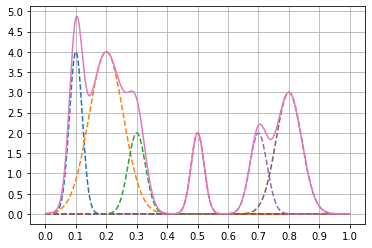

In [3]:
PeakSig = np.zeros((1000,1))
for i in range(len(x)):
    PeakSig[i] = np.sum(Gauss[i,:])
print(x.shape)
print(Gauss.shape)
print(Gauss[:,0].shape)
print(PeakSig.shape)
for i in range(len(Pos)):
    plt.plot(x,Gauss[:,i],'--')
plt.plot(x,PeakSig)
plt.yticks(np.arange(0,5.5,0.5))
plt.xticks(np.arange(0,1.1,0.1))
plt.grid()

可以使用sig.find_peaks()来寻找峰值，能够获取波峰的高度、宽度等信息

In [4]:
# peaks = sig.find_peaks(np.transpose(PeakSig))
# peaks = np.zeros([1,1000])
type(PeakSig.transpose())
peaks = PeakSig.transpose()
peaks = peaks.ravel()
PP = peaks.ravel()
peaks,pros = sig.find_peaks(peaks,height=1,width=0,prominence=0)
left_ips =pros['left_ips']
right_ips =pros['right_ips']
prominences = pros['prominences']
left_bases = pros['left_bases']
right_bases = pros['right_bases']


In [5]:
#用于修正左右bases
def baseCorrect(left_bases,right_bases):
    for i in range(len(left_bases)-1):
        if(left_bases[i]==left_bases[i+1]):
            left_bases[i+1]=right_bases[i]
        if (right_bases[i]>left_bases[i+1]):
            right_bases[i] = left_bases[i+1]
    return left_bases,right_bases

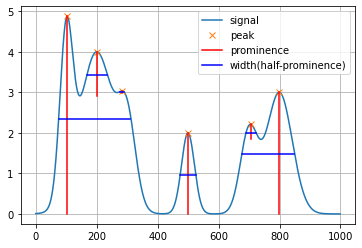

In [6]:
plt.plot(PeakSig)
plt.grid()
plt.plot(peaks,PeakSig[peaks],'x')
for i in range(len(peaks)):
    # plt.plot([left_ips[i],right_ips[i]],[int(PeakSig[peaks[i]]*0.5),int(PeakSig[peaks[i]]*0.5)])
    plt.plot([peaks[i],peaks[i]],[PeakSig[peaks[i]],PeakSig[peaks[i]]-prominences[i]],'r')
    plt.plot([left_ips[i],right_ips[i]], [PeakSig[int(left_ips[i])],PeakSig[int(left_ips[i])]], 'b')
    # plt.plot([left_bases[i],right_bases[i]], [PeakSig[int(left_bases[i])],PeakSig[int(left_bases[i])]], 'g')
plt.legend(["signal","peak","prominence","width(half-prominence)"])

F:\anaconda\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


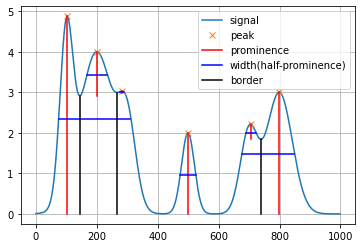

In [7]:
plt.plot(PeakSig)
plt.grid()
plt.plot(peaks,PeakSig[peaks],'x')
left_bases,right_bases = baseCorrect(left_bases,right_bases)
for i in range(len(peaks)):
    # plt.plot([left_ips[i],right_ips[i]],[int(PeakSig[peaks[i]]*0.5),int(PeakSig[peaks[i]]*0.5)])
    plt.plot([peaks[i],peaks[i]],[PeakSig[peaks[i]],PeakSig[peaks[i]]-prominences[i]],'r')
    plt.plot([left_ips[i],right_ips[i]], [PeakSig[int(left_ips[i])],PeakSig[int(left_ips[i])]], 'b')
    plt.plot([right_bases[i],right_bases[i]],[PeakSig[right_bases[i]],0],'black')
plt.legend(["signal","peak","prominence","width(half-prominence)","border"])

In [8]:
left_ips =pros['left_ips']
right_ips =pros['right_ips']
prominences = pros['prominences']
left_bases = pros['left_bases']
right_bases = pros['right_bases']

print(left_ips)
print(right_ips)
print(prominences)
print(left_bases)
print(right_bases)

[ 75.70645911 168.73448052 274.79960597 474.57563446 690.8414124
 676.79108285]
[310.55183445 234.20718431 288.70567978 524.42384038 721.57904756
 849.04279575]
[4.87208499 1.08888111 0.03659839 1.99558959 0.3740642  3.00278824]
[  0 145 266 418 586 739]
[145 266 418 586 739 999]


F:\anaconda\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


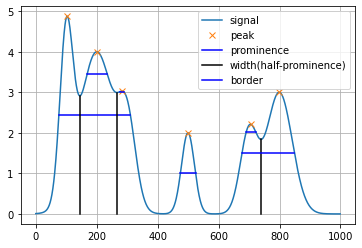

In [9]:
half_width,width_heights,half_left_ips,half_right_ips=sig.peak_widths(PP,peaks,rel_height=0.5)

plt.plot(PeakSig)
plt.grid()
plt.plot(peaks,PeakSig[peaks],'x')
left_bases,right_bases = baseCorrect(left_bases,right_bases)
for i in range(len(peaks)):
    # plt.plot([left_ips[i],right_ips[i]],[int(PeakSig[peaks[i]]*0.5),int(PeakSig[peaks[i]]*0.5)])
    # plt.plot([peaks[i],peaks[i]],[width_heights[i],0],'r')
    plt.plot([half_left_ips[i],half_right_ips[i]], [width_heights[i],width_heights[i]], 'b')
    plt.plot([right_bases[i],right_bases[i]],[PeakSig[right_bases[i]],0],'black')
plt.legend(["signal","peak","prominence","width(half-prominence)","border"])